In [16]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import pykitti
import PIL
import matplotlib.pyplot as plt
import os
import numpy as np

basedir = 'dataset'
print(os.listdir(basedir))
sequence = '03'

['sequences', 'poses']


In [18]:
dataset = pykitti.odometry(basedir, sequence, frames=range(0, 20, 5))

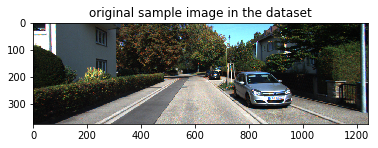

In [19]:
plt.imshow(dataset.get_cam2(0))
plt.title('original sample image in the dataset');

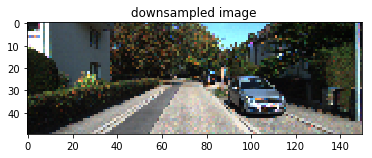

In [21]:
image_pil = dataset.get_cam2(0)
image_pil = image_pil.resize(size=(150,50))
image = np.array(image_pil)
plt.imshow(image)
plt.title('downsampled image');

In [34]:
from deep_visual_odometry.kitti_utils import KITTIdata
kitti_data = KITTIdata(basedir, sequences = ['03'])
print(kitti_data.dataset_len)

completed load sequence 03 data
{'03': 801}


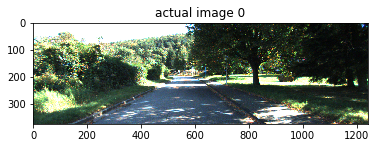

In [35]:
series, _, _ = kitti_data.get_series_train()
plt.imshow(series[13,:,:,0:3])
plt.title('actual image 0');

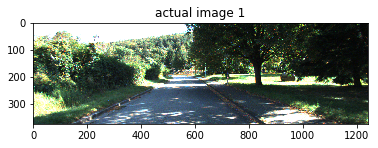

In [36]:
plt.imshow(series[14,:,:,0:3])
plt.title('actual image 1');

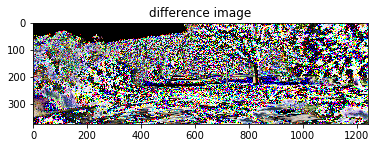

In [60]:
plt.imshow(series[14,:,:,3:6])
plt.title('difference image');

As can be seen above the series alternates between sequences, if only sequences need to be used then provide them as arguments while calling get_series().

In [63]:
inputs, inter_inputs, poses = kitti_data.get_series_train()

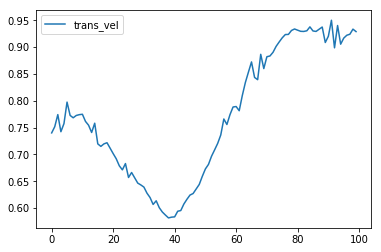

In [65]:
velocities = inter_inputs[:, 0:2]
plt.plot(velocities[:,0],label = 'trans_vel')
plt.legend();

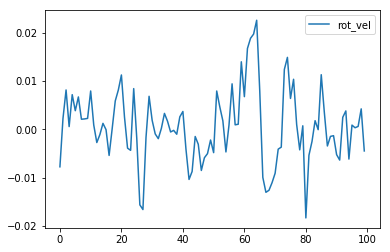

In [66]:
plt.plot(velocities[:,1],label = 'rot_vel')
plt.legend();

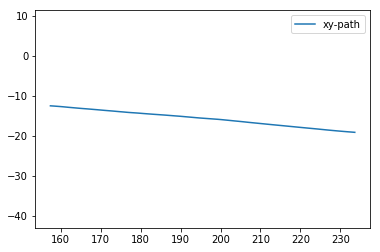

In [68]:
plt.plot(poses[:,0], poses[:,1], label = 'xy-path')
plt.axis('equal')
plt.legend();